In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import pandas as pd

import os
import sys

# Get the current directory
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to sys.path
sys.path.append(parent_dir)
sys.path.append(os.path.join(parent_dir, 'turning_scripts'))

from data_preambles import dtypes_no_id, col_names, csv_to_exclude, catalog_col_names
from path_prefix import PATH_PREFIX


In [4]:
timestamp = 1718470800
callsign_to_find = 'EZS1400'

In [6]:
df = pd.read_csv(PATH_PREFIX + f'/data/csv/{timestamp}.csv', dtype=dtypes_no_id)
df.columns = col_names
# Trim all blank spaces for column callsign
df['callsign'] = df['callsign'].str.strip()

df_callsign = df[df['callsign'] == callsign_to_find]
df_callsign.head()

,time,icao24,lat,lon,heading,callsign,geoaltitude
15379,1718470919,4b1a1a,42.007599,5.001651,28.551392,EZS1400,11422.38
15380,1718471039,4b1a1a,42.233826,5.167382,28.649609,EZS1400,11407.14
15381,1718471159,4b1a1a,42.461609,5.335610,28.688162,EZS1400,11399.52
15382,1718471219,4b1a1a,42.576965,5.421129,28.890231,EZS1400,11391.90
15383,1718471399,4b1a1a,42.923218,5.680826,29.113466,EZS1400,10767.06


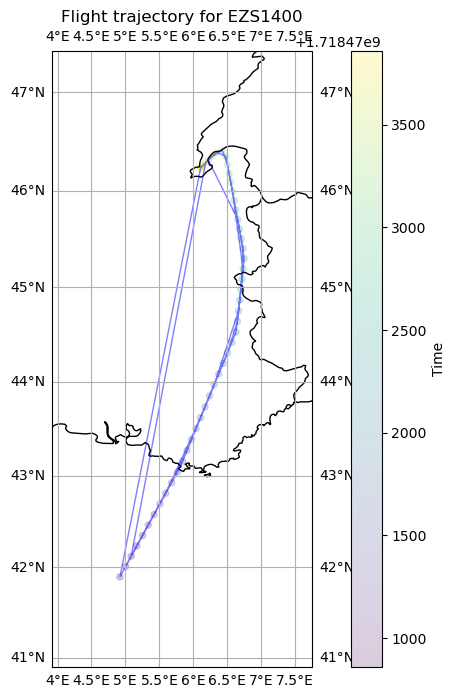

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a new figure with a specific size
plt.figure(figsize=(10, 8))

# Create a map using Mercator projection
ax = plt.axes(projection=ccrs.Mercator())

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the trajectory
# Create a scatter plot with points colored by time
scatter = plt.scatter(df_callsign['lon'], df_callsign['lat'],
                     c=df_callsign['time'], cmap='viridis',
                     marker='o', s=20,
                     alpha=0.2,
                     transform=ccrs.PlateCarree())

# Add a colorbar to show the time scale
plt.colorbar(scatter, label='Time')

# Connect points with a line to show trajectory
plt.plot(df_callsign['lon'], df_callsign['lat'],
         color='blue', linewidth=1, alpha=0.5,
         transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

# Set the map extent to focus on the trajectory with some padding
lon_min, lon_max = df_callsign['lon'].min(), df_callsign['lon'].max()
lat_min, lat_max = df_callsign['lat'].min(), df_callsign['lat'].max()
padding = 1.0  # degrees
ax.set_extent([lon_min - padding, lon_max + padding, 
               lat_min - padding, lat_max + padding], 
              crs=ccrs.PlateCarree())

# Add a title
plt.title(f'Flight trajectory for {callsign_to_find}')

plt.show()


In [21]:
from get_turns import get_turning_points

# Add the id column to df_callsign
df_callsign['id'] = df_callsign['callsign'] + df_callsign['icao24']

df_turns = get_turning_points(df_callsign)

/var/folders/8k/_h2zg_z51q9fpsbmsh42bd3h0000gn/T/ipykernel_25211/4051669067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_callsign['id'] = df_callsign['callsign'] + df_callsign['icao24']


In [24]:
df_turns

{'tp_time': array([1.71847092e+09, 1.71847104e+09, 1.71847158e+09, 1.71847236e+09,
        1.71847272e+09, 1.71847218e+09, 1.71847230e+09, 1.71847308e+09,
        1.71847195e+09, 1.71847242e+09, 1.71847290e+09, 1.71847356e+09]),
 'tp_lat': array([42.00759888, 42.23382568, 43.27160851, 44.75480936, 45.40374756,
        44.26848939, 44.64289778, 45.99565926, 43.88234206, 44.86541748,
        45.70655823, 46.31433105]),
 'tp_lon': array([5.00165072, 5.16738198, 5.90744019, 6.66622255, 6.73520769,
        5.75413921, 6.64907316, 6.57621002, 5.86649021, 6.68302264,
        6.65376245, 6.22114228]),
 'tp_alt': array([11422.38, 11407.14, 10736.58,  8793.48,  7193.28,  6762.75,
         8808.72,  4610.1 ,  8572.5 ,  8717.28,  6256.02,  1028.7 ]),
 'tp_vel': array([0.23857634, 0.24046513, 0.23442238, 0.20643279, 0.19371646,
        0.17807913, 0.20655897, 0.17125021, 0.19779015, 0.20237415,
        0.11422505, 0.        ]),
 'landed': False,
 'ident': 'EZS14004b1a1a',
 'dp_time': array([1.71847

From dark to bright: from old to new


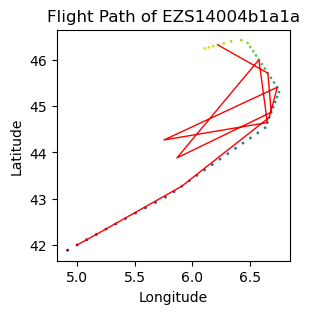

In [26]:
# Plot the 3D trajectory: lastposupdate, lat, lon with lastposupdate is the color
print('From dark to bright: from old to new')
plt.figure(figsize=(3, 3))
plt.scatter(df_callsign['lon'], df_callsign['lat'], c=df_callsign['time'], cmap='viridis', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flight Path of {}'.format(df_callsign['id'].iloc[0]))

# Plot the turns using a cross
plt.plot(df_turns['tp_lon'], df_turns['tp_lat'], c='red', linestyle='-', linewidth=1)
plt.show()
